In [1]:
import pandas as pd
import numpy as np

In [2]:
telco = pd.read_csv('telco.csv')
telco.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
# 타입 바꾸기
# 명목형 변수는 카테고리형으로 변환
# 메모리 사용 줄어듦.
telco = telco.astype({
    'Leave': 'category',
    'MemberWeeks': np.int16,
    'NewContract': 'category',
    'IsData': 'category',
    'DataAmount': np.float16,
    'Callcenter': np.int16,
    'CalMins': np.float16,
    'CalCounts': np.float16,
    'MonthlyFee': np.float16,
    'OverFee': np.float16,
    'RoamingMin': np.float16,  
})
print(telco.dtypes)

Leave          category
MemberWeeks       int16
NewContract    category
IsData         category
DataAmount      float16
Callcenter        int16
CalMins         float16
CalCounts       float16
MonthlyFee      float16
OverFee         float16
RoamingMin      float16
dtype: object


In [5]:
# 결측치 없음
telco.isnull().sum()

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

In [6]:
# 연속형 변수끼리 기술 통계
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
DataAmount,3333.0,0.816895,1.272461,0.0,0.000000,0.000000,1.780273,5.398438
Callcenter,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
CalMins,3333.0,inf,54.468750,0.0,143.750000,179.375000,216.375000,350.750000
CalCounts,3333.0,inf,20.062500,0.0,87.000000,101.000000,114.000000,165.000000
MonthlyFee,3333.0,inf,16.421875,14.0,45.000000,53.500000,66.187500,111.312500
OverFee,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500
RoamingMin,3333.0,10.234375,2.791016,0.0,8.500000,10.296875,12.101562,20.000000


In [7]:
# 카테고리형끼리 기술통계
telco.describe(include = 'category').T

,count,unique,top,freq
Leave,3333,2,0,2850
NewContract,3333,2,1,3010
IsData,3333,2,0,2411


In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Leave        3333 non-null   category
 1   MemberWeeks  3333 non-null   int16   
 2   NewContract  3333 non-null   category
 3   IsData       3333 non-null   category
 4   DataAmount   3333 non-null   float16 
 5   Callcenter   3333 non-null   int16   
 6   CalMins      3333 non-null   float16 
 7   CalCounts    3333 non-null   float16 
 8   MonthlyFee   3333 non-null   float16 
 9   OverFee      3333 non-null   float16 
 10  RoamingMin   3333 non-null   float16 
dtypes: category(3), float16(6), int16(2)
memory usage: 62.3 KB


In [9]:
# 연속형 변수끼리 상관관계 구하기
telco.corr()

,MemberWeeks,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
MemberWeeks,1.000000,0.014392,-0.003796,0.006208,0.038470,0.012596,-0.006743,0.009511
DataAmount,0.014392,1.000000,-0.021723,0.003189,-0.007962,0.781649,0.019636,0.162746
Callcenter,-0.003796,-0.021723,1.000000,-0.013409,-0.018942,-0.028029,-0.012959,-0.009633
CalMins,0.006208,0.003189,-0.013409,1.000000,0.006750,0.567981,0.007029,-0.010169
CalCounts,0.038470,-0.007962,-0.018942,0.006750,1.000000,-0.007953,-0.021427,0.021550
MonthlyFee,0.012596,0.781649,-0.028029,0.567981,-0.007953,1.000000,0.281783,0.117423
OverFee,-0.006743,0.019636,-0.012959,0.007029,-0.021427,0.281783,1.000000,-0.011044
RoamingMin,0.009511,0.162746,-0.009633,-0.010169,0.021550,0.117423,-0.011044,1.000000


<AxesSubplot:>

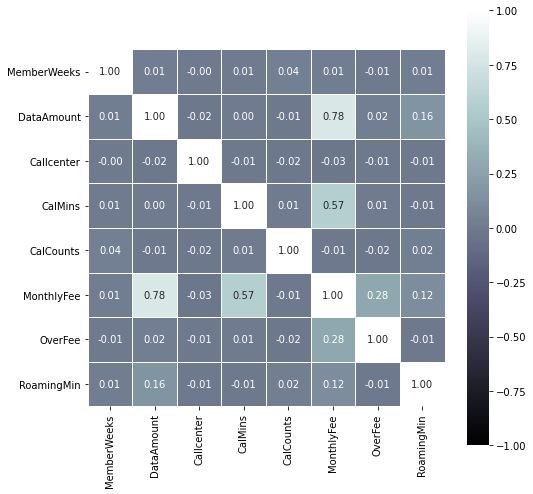

In [10]:
# 상관관계 히트맵 그리기
import matplotlib.pyplot as plt     # 필요 패키지 불러오기
import seaborn as sns               # 필요 패키지 불러오기


fig, ax = plt.subplots(figsize=(8, 8))
corr = telco.corr()
sns.heatmap(
    corr,
    fmt='.2f',     # 소수점 둘째자리
    annot=True,    # 숫자 표시
    ax=ax,
    cmap='bone',   # 컬러맵
    vmin=-1,
    vmax=1,
    square=True,
    linewidths = 0.5    # 0.5 굵기로 구분선
)
# MonthlyFee와 DataAmount, MonthlyFee와 CalMins이 양의 상관관계를 보임

<AxesSubplot:ylabel='Frequency'>

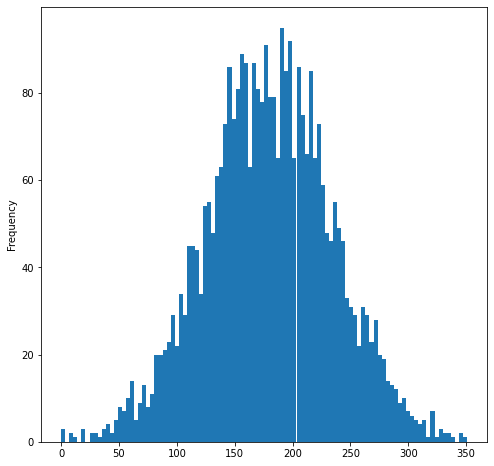

In [11]:
# 월평균 전화량의 히스토그램
fig, ax = plt.subplots(figsize=(8, 8))
telco.CalMins.plot.hist(ax = ax, bins = 100)

In [12]:
# 월평균 전화량이 정규분포인지 아닌지 확인
from scipy import stats
stats.kstest(telco.CalMins, cdf='norm')
# p-value가 0.05 이하이므로 정규분포가 아니다.

KstestResult(statistic=0.999099909990996, pvalue=0.0)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0. ,   0. ,   2.6, ..., 345.2, 346.8, 350.8], dtype=float16)),
 (54.5029472594755, 179.75, 0.9998363080901158))

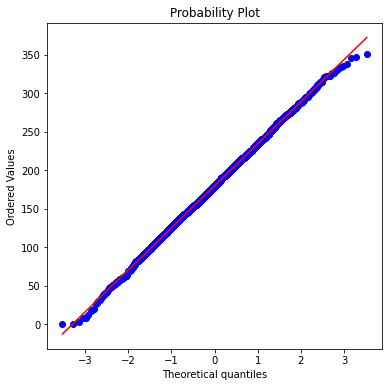

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(telco.CalMins, plot=ax)

In [14]:
# 가입기간이 정규분포인지 아닌지 확인
from scipy import stats
stats.kstest(telco.MemberWeeks, cdf='norm')
# p-value가 0.05 이하이므로 정규분포가 아니다.

KstestResult(statistic=0.9959498319413672, pvalue=0.0)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  1,   1,   1, ..., 225, 232, 243], dtype=int16)),
 (39.82425569380444, 101.06480648064806, 0.9992452975727015))

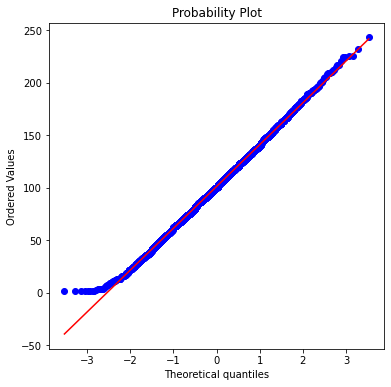

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(telco.MemberWeeks, plot=ax)

C:\Users\ynk99\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Leave'>

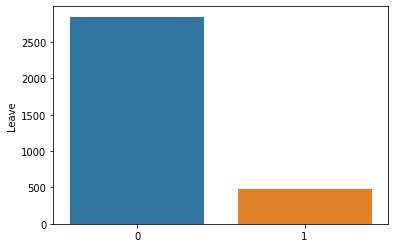

In [16]:
# 가입해지여부 막대그래프 그리기.
# 가입을 해지하지 않은 사람(0)이 가입을 해지한 사람(1)보다 많다.
sns.barplot(telco.Leave.value_counts().index,
            telco.Leave.value_counts())

C:\Users\ynk99\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='NewContract'>

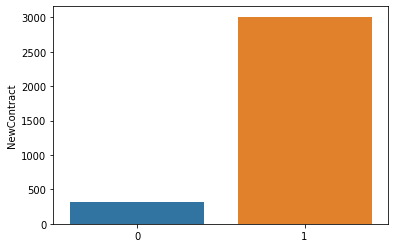

In [17]:
# 가입갱신여부 막대그래프(0과 1) 그리기.
# 가입을 갱신한 사람(1)이 가입을 갱신하지 않은 사람(0)보다 많다.

sns.barplot(telco.NewContract.value_counts().index,
            telco.NewContract.value_counts())

C:\Users\ynk99\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='NewContract'>

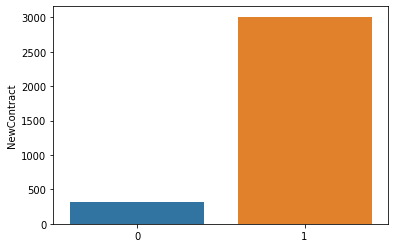

In [18]:
# 데이터요금제사용여부 막대그래프(0과 1) 그리기.
# 사용하는 사람(1)이 사용하지 않는 사람(0)보다 많다.

sns.barplot(telco.NewContract.value_counts().index,
            telco.NewContract.value_counts())

<AxesSubplot:>

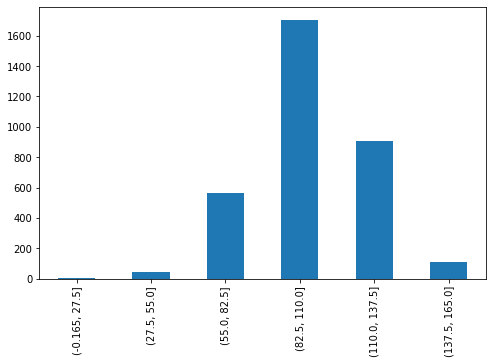

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
pd.cut(telco.CalCounts, 6).value_counts().sort_index().plot.bar()
# 월평균 전화 횟수는 약 83번에서 110번 사이인 경우가 가장 많다.

<AxesSubplot:xlabel='Leave', ylabel='CalMins'>

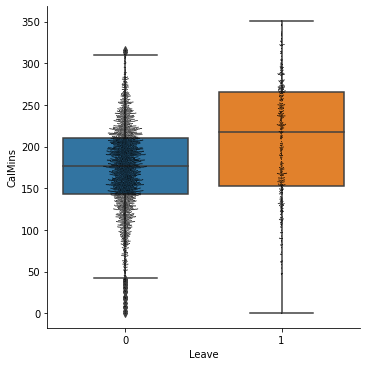

In [20]:
# 전반적으로 해지한 사람들의 월평균전화량이 더 많은 것을 알 수 있다.
a = sns.catplot(x='Leave', y='CalMins', data=telco, kind='box')
sns.swarmplot(x='Leave', y='CalMins', data=telco, color='k', size=1, ax=a.ax)

C:\Users\ynk99\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<AxesSubplot:xlabel='Leave', ylabel='CalCounts'>

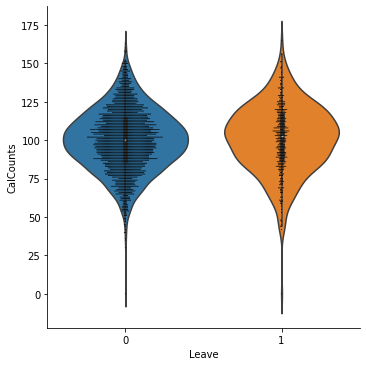

In [21]:
# 해지 여부의 전화 횟수의 바이올린 플롯은 별 차이가 없어 보인다.
b = sns.catplot(x='Leave', y='CalCounts', data=telco, kind='violin')
sns.swarmplot(x='Leave', y='CalCounts', data=telco, color='k', size=1, ax=b.ax)

<AxesSubplot:xlabel='Leave', ylabel='MonthlyFee'>

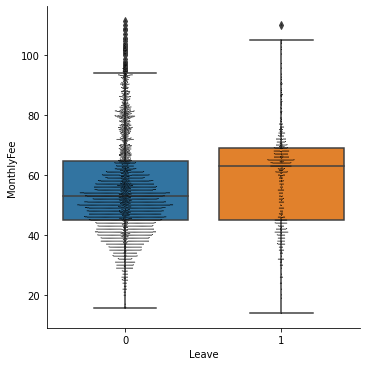

In [22]:
# 해지한 사람들의 월평균요금이 전반적으로 더 비쌌던 것을 알 수 있다.
c = sns.catplot(x='Leave', y='MonthlyFee', data=telco, kind='box')
sns.swarmplot(x='Leave', y='MonthlyFee', data=telco, color='k', size=1, ax=c.ax)

해당 이동통신사를 해지한 사람들은 가격에 별다른 매력을 느끼지 못했거나 사용하는 전화량에 맞는 다른 이동통신사의 요금제를 선택했을 것이라고 추측 가능하다.

<AxesSubplot:>

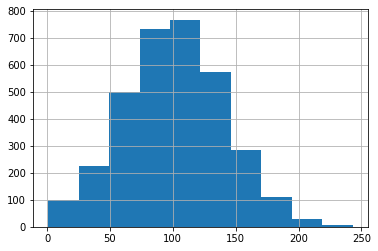

In [23]:
telco.MemberWeeks.hist()

In [24]:
#구간을 정한 뒤 각 값이 어느 구간에 들어가는지 알려준다.

bins = [-np.inf, 60, 120, 180, np.inf]
cuts = pd.cut(telco.MemberWeeks, bins=bins)
cuts

0       (120.0, 180.0]
1        (60.0, 120.0]
2       (120.0, 180.0]
3        (60.0, 120.0]
4        (60.0, 120.0]
             ...      
3328      (180.0, inf]
3329     (60.0, 120.0]
3330      (-inf, 60.0]
3331      (180.0, inf]
3332     (60.0, 120.0]
Name: MemberWeeks, Length: 3333, dtype: category
Categories (4, interval[float64]): [(-inf, 60.0] < (60.0, 120.0] < (120.0, 180.0] < (180.0, inf]]

In [25]:
(
    telco
    .groupby(cuts)
    ['IsData']
    .value_counts(normalize=True)
    .round(3)
)
# 가입 기간별 데이터요금제 사용 여부의 차이는 별 차이가 없어 보인다.

MemberWeeks     IsData
(-inf, 60.0]    0         0.730
                1         0.270
(60.0, 120.0]   0         0.723
                1         0.277
(120.0, 180.0]  0         0.721
                1         0.279
(180.0, inf]    0         0.716
                1         0.284
Name: IsData, dtype: float64

<AxesSubplot:>

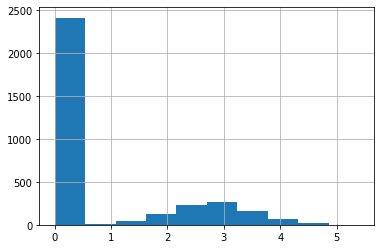

In [26]:
telco.DataAmount.hist()

In [27]:
#구역을 정한 뒤 각 값이 어느 구역에 속하는지 표시해줌
bins = [-np.inf, 1, 2, 3, 4, np.inf]
cuts = pd.cut(telco.DataAmount, bins=bins)
cuts

0        (2.0, 3.0]
1        (3.0, 4.0]
2       (-inf, 1.0]
3       (-inf, 1.0]
4       (-inf, 1.0]
           ...     
3328     (2.0, 3.0]
3329    (-inf, 1.0]
3330    (-inf, 1.0]
3331    (-inf, 1.0]
3332     (3.0, 4.0]
Name: DataAmount, Length: 3333, dtype: category
Categories (5, interval[float64]): [(-inf, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, inf]]

In [28]:
(
    telco
    .groupby(cuts)
    ['IsData']
    .value_counts(normalize=True)
    .round(3)
)
# 데이터를 거의 쓰지 않는 사람들을 제외하고는 데이터요금제를 쓰는 것을 알 수 있다.

DataAmount   IsData
(-inf, 1.0]  0         0.996
             1         0.004
(1.0, 2.0]   1         1.000
(2.0, 3.0]   1         1.000
(3.0, 4.0]   1         1.000
(4.0, inf]   1         1.000
Name: IsData, dtype: float64

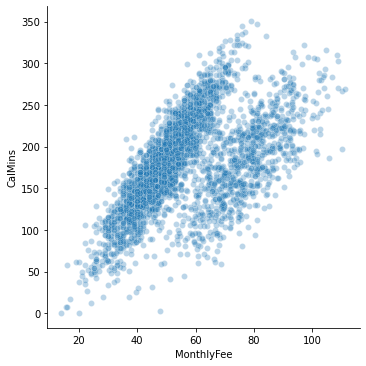

In [29]:
# 산점도를 보면 월평균 요금과 월평균 전화량은 양의 상관관계를 보인다.
sns.relplot(data=telco, x='MonthlyFee', y = 'CalMins', alpha = 0.3)

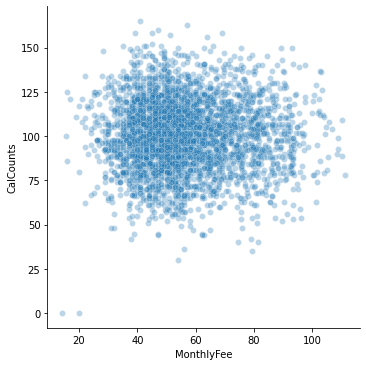

In [30]:
# 산점도를 보면 전화 횟수와 월평균 요금은 별로 관련이 없어 보인다.
sns.relplot(data=telco, x='MonthlyFee', y = 'CalCounts', alpha = 0.3)

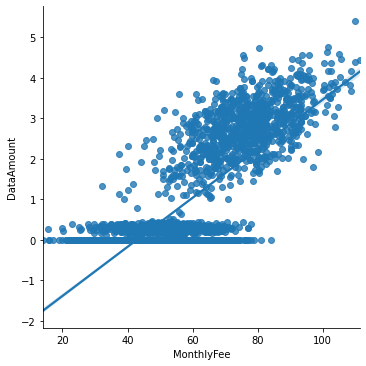

In [31]:
# 추세선이 있는 산점도. 월평균 요금과 데이터사용량은 양의 상관관계를 보인다.

res = sns.lmplot(
    x = 'MonthlyFee',
    y = 'DataAmount',
    data = telco)

In [32]:
# 해당 이동통신사를 계속 쓰고 있는 사람만
bool_y = (telco['Leave'] == 0)|(telco['NewContract'] == 1)     # 판다스이므로 or 대신 |
telco_y = telco[bool_y]
telco_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Leave        3196 non-null   category
 1   MemberWeeks  3196 non-null   int16   
 2   NewContract  3196 non-null   category
 3   IsData       3196 non-null   category
 4   DataAmount   3196 non-null   float16 
 5   Callcenter   3196 non-null   int16   
 6   CalMins      3196 non-null   float16 
 7   CalCounts    3196 non-null   float16 
 8   MonthlyFee   3196 non-null   float16 
 9   OverFee      3196 non-null   float16 
 10  RoamingMin   3196 non-null   float16 
dtypes: category(3), float16(6), int16(2)
memory usage: 84.6 KB


In [33]:
# 해지하거나 갱신하지 않은 사람만
bool_n = (telco['Leave'] == 1)|(telco['NewContract'] == 0)   # 판다스이므로 or 대신 |
telco_n = telco[bool_n]
telco_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 3 to 3331
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Leave        669 non-null    category
 1   MemberWeeks  669 non-null    int16   
 2   NewContract  669 non-null    category
 3   IsData       669 non-null    category
 4   DataAmount   669 non-null    float16 
 5   Callcenter   669 non-null    int16   
 6   CalMins      669 non-null    float16 
 7   CalCounts    669 non-null    float16 
 8   MonthlyFee   669 non-null    float16 
 9   OverFee      669 non-null    float16 
 10  RoamingMin   669 non-null    float16 
dtypes: category(3), float16(6), int16(2)
memory usage: 18.0 KB


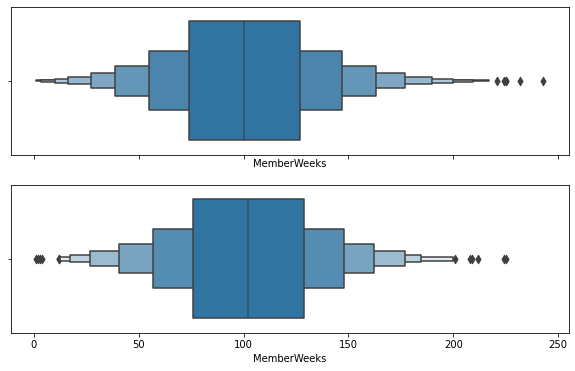

In [34]:
# 현재 해당 이동통신사를 쓰고있는 사람과 쓰고있지 않은 사람의 가입기간은 별 차이가 없어 보인다.
fig, ax = plt.subplots(2, 1,sharex =True, figsize=(10,6))

a = sns.boxenplot(ax=ax[0], data=telco_y, x='MemberWeeks')
b = sns.boxenplot(ax=ax[1], data=telco_n, x='MemberWeeks')   

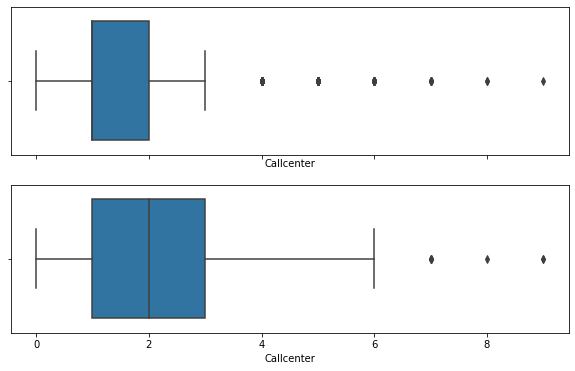

In [35]:
# 전반적으로 해당 이동통신사를 더 이상 쓰지 않는 사람들의 고객센터 전화량이 더 많다. 
fig, ax = plt.subplots(2, 1,sharex =True, figsize=(10,6))

a = sns.boxplot(ax=ax[0], data=telco_y, x='Callcenter')
b = sns.boxplot(ax=ax[1], data=telco_n, x='Callcenter')

<AxesSubplot:xlabel='MonthlyFee', ylabel='CalMins'>

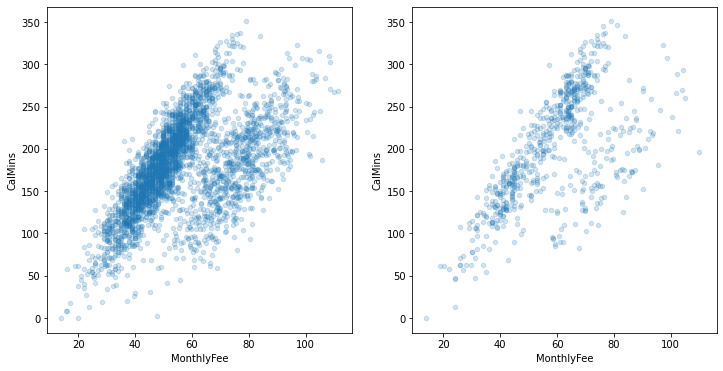

In [36]:
fig, ax = plt.subplots(1, 2, sharex =True, figsize=(12, 6))

telco_y.plot(kind = 'scatter',
             x='MonthlyFee',
             y='CalMins',
             alpha=.2,   
             ax=ax[0]
            )

telco_n.plot(kind = 'scatter',
             x='MonthlyFee',
             y='CalMins',
             alpha=.2,   
             ax=ax[1]
            )

# 이동통신사를 쓰는 사람들과 쓰지않는 사람들의 산점도 분포의 차이는 별로 없어 보인다.
# 쓰는 사람들의 수가 쓰지 않는 사람들의 수보다 많아 점이 몰린 부분이 좀 더 진하게 보인다.

의미 해석 및 가치 도출

1. 해당 이동통신사를 해지한 사람들은 가격에 별다른 매력을 느끼지 못했거나 사용하는 전화량에 맞는 다른 이동통신사의 요금제를 선택했을 것이라고 추측 가능하다.
2. 월평균요금과 상관관계가 있는 것은 데이터 사용량과 월평균 전화량이다.